In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data frame
df = pd.read_json('df_final.json')
df.head()

,file_name,text,text_clean,topic,label
0,CAR0001.txt,"D: What brought you in today?\n\nP: Sure, I'm ...",brought today sure lot chest pain thought get ...,0.0,0
1,CAR0002.txt,"D: What brings you in here today?\n\nP: Yeah, ...",brings today pain chest pain exactly right lef...,0.0,0
2,CAR0003.txt,"D: What brings you in here today?\n\nP: Yeah, ...",brings today feeling breathless getting worse ...,2.0,2
3,CAR0004.txt,D: What brings you here today?\n\nP: I'm just ...,brings today sharp pain chest scared heart att...,0.0,0
4,CAR0005.txt,D: It sounds like that you're experiencing som...,sounds youre experiencing chest pain chest pai...,0.0,0


## Data Visualization
NLP insights

In [5]:
# Character counts
df['char_count'] = df['text_clean'].map(lambda x: len(x))

# Word counts
df['word_count'] = df['text_clean'].map(lambda x: len(x.split()))

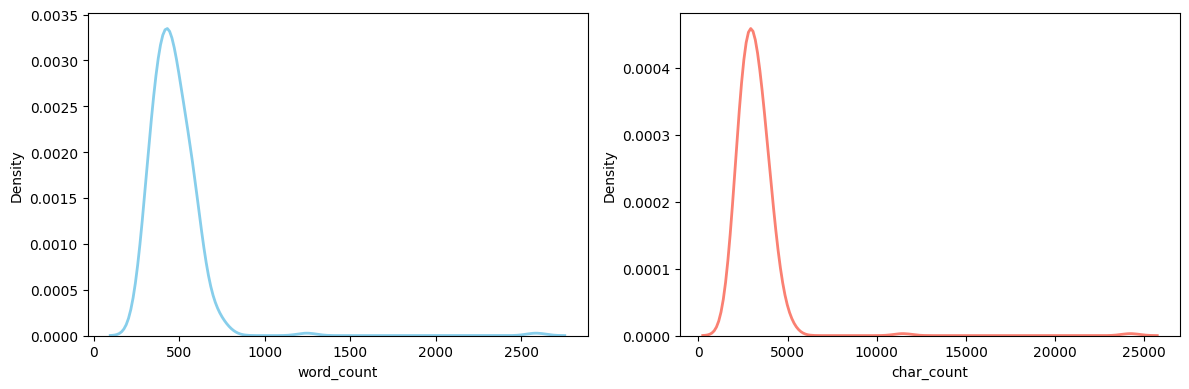

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.kdeplot(data=df, x="word_count", color="skyblue", linewidth=2, ax=axes[0])
sns.kdeplot(data=df, x="char_count", color="salmon", linewidth=2, ax=axes[1])

plt.tight_layout()
plt.show()

In [ ]:
# Replace num to string in label column
df["label"] = df["label"].replace({
    0: "general illness",
    1: "joint illness",
    2: "chronic illness"
})

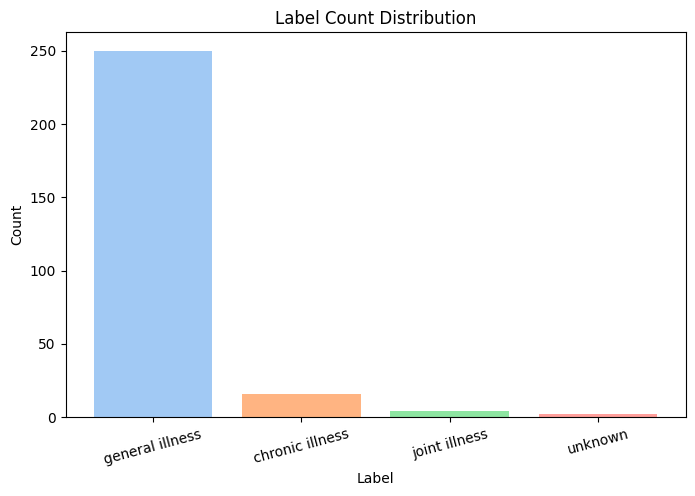

In [38]:
# Count labels
label_counts = df['label'].value_counts()

# Choose a Seaborn color palette
colors = sns.color_palette("pastel", len(label_counts)) 

# Plot
plt.figure(figsize=(8, 5))
plt.bar(label_counts.index, label_counts.values, color=colors)

plt.title("Label Count Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=15)

plt.show()